In [13]:
%load_ext autoreload
%autoreload 2

from img_pipeline import process_image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('bloomberg.jpg')

def print_numpy_img(tensor): # [(x,y)]*time
    plt.imshow(
        tensor,
        cmap='hot',
        interpolation='nearest',
        extent=[0, 1, 1, 0]  # force axes to go from 0 to 1
    )
    plt.colorbar()
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


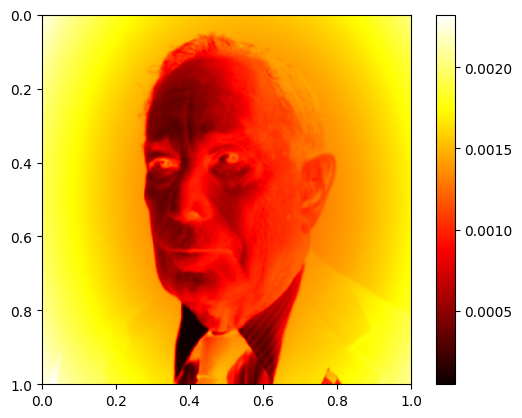

In [14]:
np_img = process_image(img)
print_numpy_img(np_img)